# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [3]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [4]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 3a) Plot the data in a scatterplot

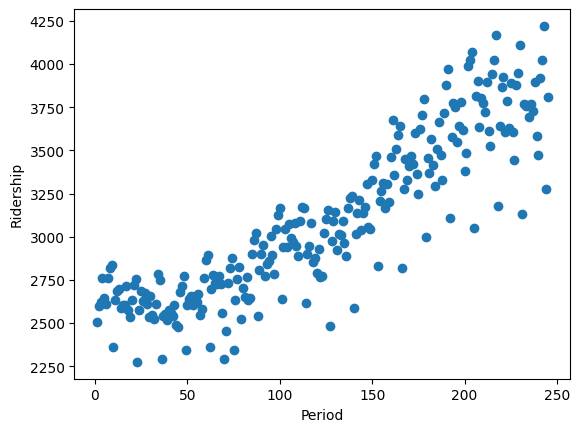

In [5]:
#Your code for scatterplot here
plt.scatter(xvals, yvals)
plt.xlabel("Period")
plt.ylabel("Ridership")
plt.show()


## 3b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

beta0=2367.382 and beta1=5.939


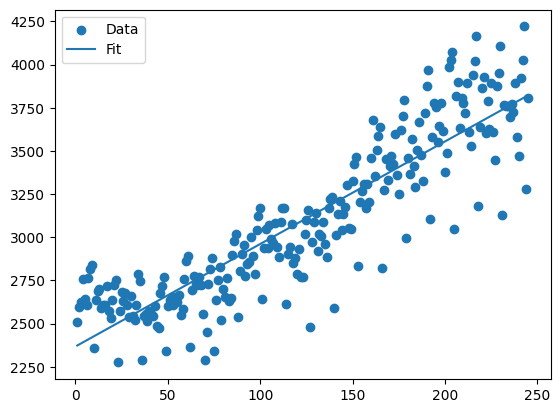

mse_2=45323.636 and R2=0.796


In [10]:
#Your code here
def polyreg(data_matrix, k):
    N, _ = data_matrix.shape
    xs = data_matrix[:, 0]
    ys = data_matrix[:, 1]
    # Create the generalized matrix X.
    Xn = np.zeros((N, k+1))  # Define the size of Xn in advance for memory reasons.
    for i in range(k+1):
        Xn[:, i] = xs ** i 
    
    beta_vector = np.linalg.lstsq(Xn, ys, rcond=None)[0]

    fitted_ys_vector = Xn.dot(beta_vector)
    residuals_vector = ys - fitted_ys_vector
    return beta_vector, fitted_ys_vector, residuals_vector

linfit = polyreg(np.column_stack((xvals, yvals)), 1)
beta0, beta1 = linfit[0]
fitted_ys = linfit[1]
fitted_residuals = linfit[2]

print(f"{beta0=:.3f} and {beta1=:.3f}")

plt.scatter(xvals, yvals, label="Data")
plt.plot(xvals, fitted_ys, label="Fit")
plt.legend()
plt.show()

zerofit_residuals = polyreg(np.column_stack((xvals, yvals)), 0)[2]
sse_0 = sum(zerofit_residuals ** 2)
sse_2 = sum(fitted_residuals ** 2)
R2 = 1-sse_2/sse_0
mse_2 = sse_2/N
print(f"{mse_2=:.3f} and {R2=:.3f}")


## 3c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

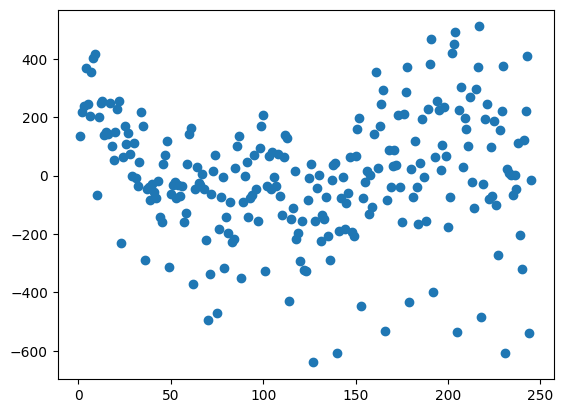

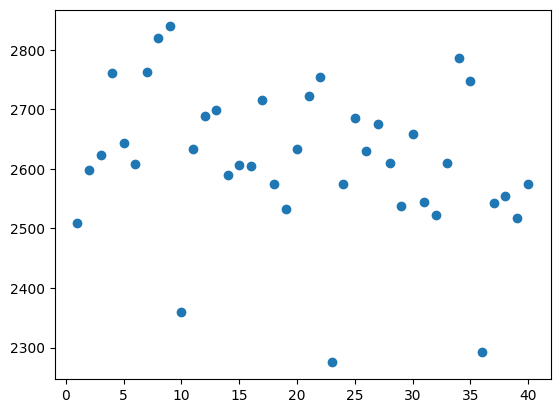

In [13]:
# Your code here
plt.scatter(xvals, fitted_residuals)
plt.show()

# Short duration
plt.scatter(xvals[0:40], yvals[0:40])
plt.show()

< Comment on periodic components here >
It is quite challenging to identify any periodicity in the residuals honestly. They seem to bob up and down almost randomly to me.

### 3d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


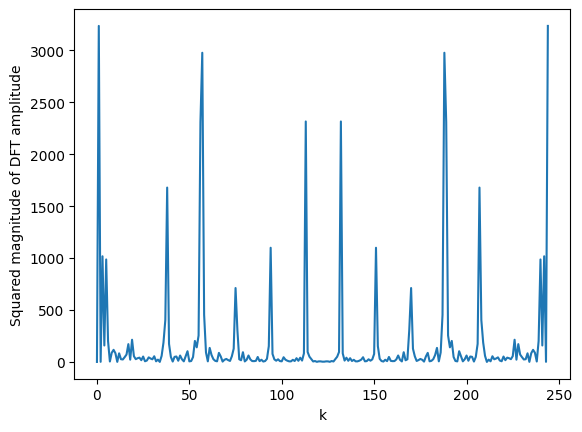

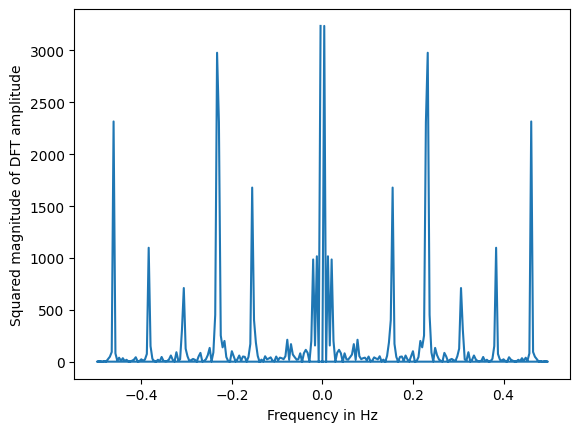

In [24]:
# Your code to compute and plot the periodogram
T = xvals[1] - xvals[0]

# Periodogram of the residuals (square of the abs. value of the fft)
pgram = np.abs(np.fft.fft(fitted_residuals, N)/N) ** 2
indices = np.linspace(0, (N-1), num = N)
freqs_hz = np.fft.fftfreq(N)/T
plt.plot(indices, pgram)
plt.xlabel("k")
plt.ylabel("Squared magnitude of DFT amplitude")
plt.show()
plt.plot(freqs_hz, pgram)
plt.xlabel("Frequency in Hz")
plt.ylabel("Squared magnitude of DFT amplitude")
plt.show()



In [ ]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
top_inds = indices[(pgram > 0.5*np.max(pgram))]
top_freqs_hz = freqs_hz[(pgram > 0.2*np.max(pgram))]
print('Top indices:', top_inds, ' Top frequencies in Hz:', top_freqs_hz)

Top indices: [  1.  38.  56.  57. 113. 132. 188. 189. 207. 244.]  Top frequencies in Hz: [ 0.00408163  0.0122449   0.02040816  0.15510204  0.22857143  0.23265306
  0.30612245  0.38367347  0.46122449 -0.46122449 -0.38367347 -0.30612245
 -0.23265306 -0.22857143 -0.15510204 -0.02040816 -0.0122449  -0.00408163]


## 3e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 

All numerical outputs should be displayed to three decimal places.

The coefficients of the vector beta are: [-51.25288797 101.55580598]


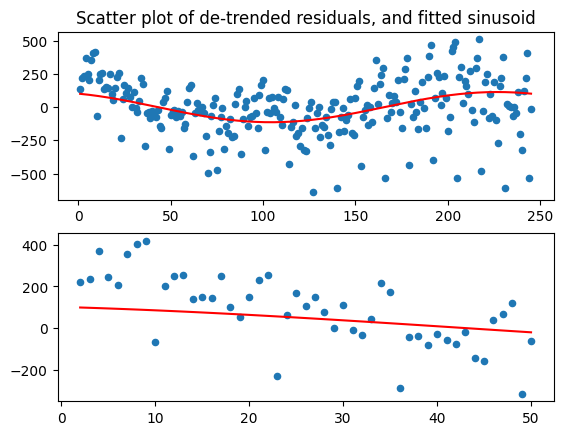

In [30]:
# Your code here
w = 2*math.pi*top_freqs_hz[0]  # Freq. in rad/s corresponding to k* is w = 2.pi.k*/(NT)

# Now form the X matrix with columns sin(wx) and cos(wx) for x in dates. First define its transpose
XT = np.vstack((np.sin(w*xvals), np.cos(w*xvals)))
X = np.transpose(XT)

beta_sc = np.linalg.inv(XT.dot(X)).dot(XT).dot(fitted_residuals) # Calculating the least-squares coefficients
print('The coefficients of the vector beta are:', beta_sc)
fit_sc = X.dot(beta_sc)

plt.subplot(211)
plt.scatter(xvals, fitted_residuals, s=20)
plt.plot(xvals, fit_sc, 'r')
plt.title('Scatter plot of de-trended residuals, and fitted sinusoid')
# Zoom in to a few values
plt.subplot(212)
plt.scatter(xvals[1:50], fitted_residuals[1:50], s=20)
plt.plot(xvals[1:50], fit_sc[1:50], 'r')

plt.show()


### 3f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

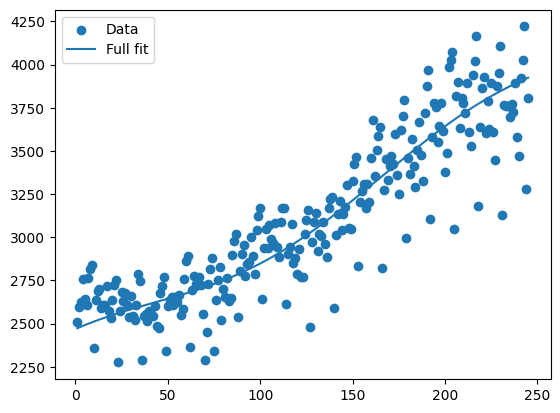

mse_total=38853.416 and r2_total=0.825


In [33]:
# Your code here
total_modeled_ys = fitted_ys + fit_sc

total_residual = yvals - total_modeled_ys

sse_total = sum(total_residual ** 2)
mse_total = sse_total / N
r2_total = 1 - sse_total/sse_0
plt.scatter(xvals, yvals, label="Data")
plt.plot(xvals, total_modeled_ys, label="Full fit")
plt.legend()
plt.show()
print(f"{mse_total=:.3f} and {r2_total=:.3f}")

< Add comment on the improvement over the linear fit. >

The fit is slightly better, as can be seen by the higher r squared value (0.825 vs. 0.796) and also visually on superposition of the model and the scatter of the original data. This doesn't actually mean that much in itself, since we can obtain an arbitrarily good r-squared value by increasing the degree of the initial polynomial. However in this case I think that this improvement **is** valuable because, manifestly, the residuals had some periodicity (something which is confirmed quantitatively by the spectrum), so that our model is tapping into the insights we have about the underlying data, rather than just blindly overfitting it.